#Task 2 (Work with Dates)
you are working in metro station and your manager askes you get to him which day have more entries in the turnstiles this is turnstiles
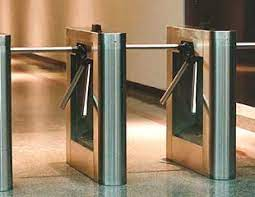

**use turnstile_220319.csv dataset**

In [1]:
import pandas as pd


In [2]:
df= pd.read_csv('turnstile_220319.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207556 entries, 0 to 207555
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   207556 non-null  object
 1   UNIT                                                                  207556 non-null  object
 2   SCP                                                                   207556 non-null  object
 3   STATION                                                               207556 non-null  object
 4   LINENAME                                                              207556 non-null  object
 5   DIVISION                                                              207556 non-null  object
 6   DATE                                                                  207556 non-null  objec

# as we see above the data time is object so we can`t extract imformation from it so we need first to creat a new column to combine data and time together and after that convert them to data time format to extract the name of day

In [4]:
df.head(2)

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  07:00:00   

      DESC  ENTRIES  \
0  REGULAR  7693605   
1  REGULAR  7693608   

   EXITS                                                                 
0                                            2677444                     
1                                            2677454

In [5]:
df['date time'] = df['DATE']+' '+df['TIME']

In [6]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  03/12/2022  19:00:00   

      DESC  ENTRIES  \
0  REGULAR  7693605   
1  REGULAR  7693608   
2  REGULAR  7693627   
3  REGULAR  7693672   
4  REGULAR  7693730   

   EXITS                                                                 \
0                                            2677444                      
1                                            2677454                      
2                                            2677547                      
3                                            2677621                      
4                                            2677683                      

             date time  
0  03/12/2022 03:00:00  
1  03/12/2022 07:00:00  
2  03/12/2022 11:00:00  
3  03/12/2022 15:00:00  
4  03/12/2022 19:00:00

In [8]:
df['date time']=pd.to_datetime(df['date time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207556 entries, 0 to 207555
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count   Dtype         
---  ------                                                                --------------   -----         
 0   C/A                                                                   207556 non-null  object        
 1   UNIT                                                                  207556 non-null  object        
 2   SCP                                                                   207556 non-null  object        
 3   STATION                                                               207556 non-null  object        
 4   LINENAME                                                              207556 non-null  object        
 5   DIVISION                                                              207556 non-null  object        
 6   DATE                        

In [24]:
# Take the date and time fields into a single datetime column
df['day'] = df['date time'].dt.dayofweek

# creat a new column to extract the name of day so to solve your task

In [ ]:
def name_day(row):
    if row['day'] == 0:
        return 'Monday'
    elif row['day'] == 1:
        return 'Tuesday'
    elif row['day'] == 2:
        return 'Wednesday'
    elif row['day'] == 3:
        return 'Thursday'
    elif row['day'] == 4:
        return 'Friday'
    elif row['day'] == 5:
        return 'Saturday'
    elif row['day'] == 6:
        return 'Sunday'

In [ ]:
df['name of day'] = df.apply(name_day,axis = 1)
df

# now it`s time to see the most day have the biggest number of entries

<AxesSubplot:>

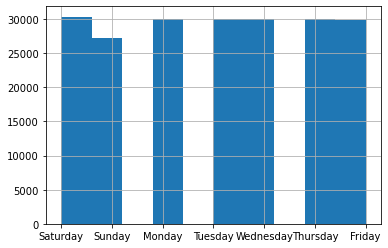

In [27]:
df['name of day'].hist()

In [28]:
import plotly.express as px

In [30]:
px.histogram(df,x = 'name of day',color = 'name of day',color_discrete_sequence=px.colors.qualitative.G10)